In [44]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load data 
data = pd.read_csv("bank-additional-full.csv", delimiter = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
# Check for 'unknown' values and NA
print("Missing values:")
print(data.isna().sum())
print("\nUnknown values per column:")
print((data == 'unknown').sum())


Missing values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Unknown values per column:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


No missing data in the dataset,there are presence of unknown values in the columns; job,marital,education,default,housing and loan

In [46]:
#check first row of each column
data.iloc[0]

age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  261
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 0, dtype: object

In [47]:
#check for shape
data.shape

(41188, 21)

In [48]:
#check for duplicates
data.duplicated().sum()

12

In [49]:
#remove duplicates
data.drop_duplicates(keep = 'first', inplace = True)
print(data.duplicated().sum())
print(data.shape)

0
(41176, 21)


In [50]:
#drop duration column
data.drop('duration', axis = 1, inplace = True)

In [51]:
#check metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null  floa

In [52]:
#check descriptive statistics of the dataset
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Customers above 90 years old are rare and may be outliers. We will consider capping or treating them separately in models.

While most customers are contacted 1–3 times, some were contacted over 50 times. These are likely outliers that can skew model performance.

A value of 999 means the customer was never contacted before. This is a placeholder, not a real number. It should be replaced with a flag variable (e.g., was_previously_contacted).

Most customers had no previous contact. This feature is highly skewed and may work better as a binary or categorical variable.


In [53]:
numeric_cols = data.select_dtypes(include='number').columns

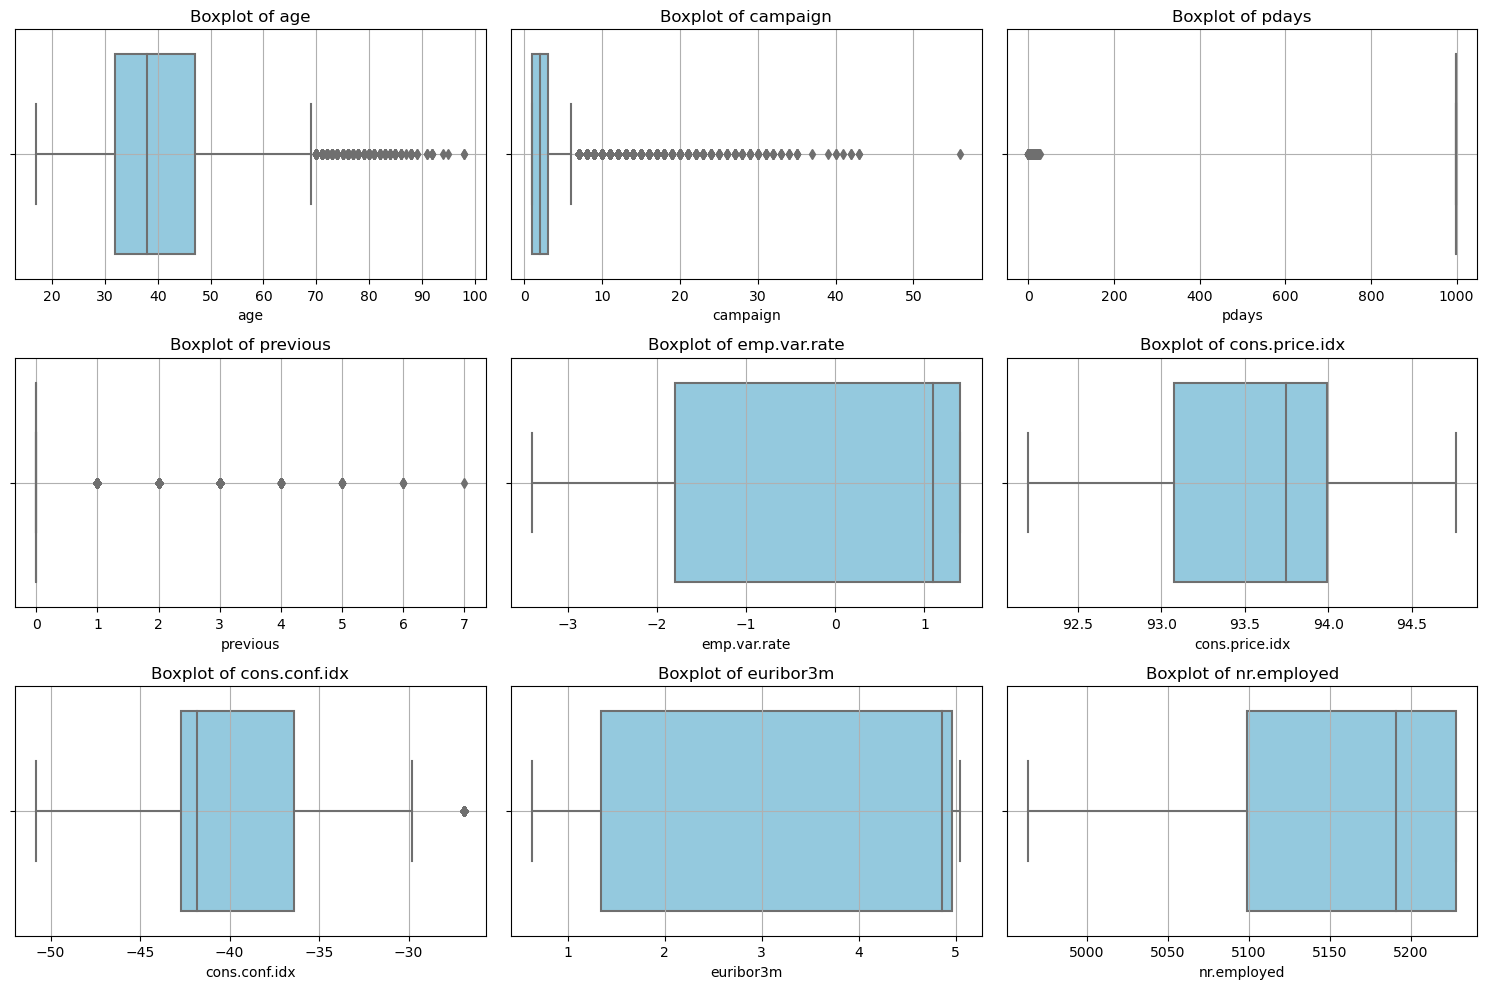

In [54]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)

plt.tight_layout()  # Move it here, outside the loop
plt.show()


In [55]:
#checking statistics of outlier features

data[['age', 'pdays', 'campaign', 'previous']].describe()

,age,pdays,campaign,previous
count,41176.00000,41176.000000,41176.000000,41176.000000
mean,40.02380,962.464810,2.567879,0.173013
std,10.42068,186.937102,2.770318,0.494964
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,999.000000,1.000000,0.000000
50%,38.00000,999.000000,2.000000,0.000000
75%,47.00000,999.000000,3.000000,0.000000
max,98.00000,999.000000,56.000000,7.000000


In [56]:
from scipy.stats import zscore

# Select numeric columns to check for outliers
numeric_cols = data.select_dtypes(include='number').columns

# Calculate Z-scores
z_scores = data[numeric_cols].apply(zscore)

# Filter out rows where any z-score > 3 or < -3
data_no_outliers = data[(z_scores < 3).all(axis=1)]

print(f"Original rows: {len(data)}")
print(f"Rows after removing outliers: {len(data_no_outliers)}")


Original rows: 41176
Rows after removing outliers: 38941


In [57]:
len(data[data['pdays'] == 999]) / len(data) * 100


96.32067223625413

In [58]:
len(data[data['campaign'] > 20])  / len(data) * 100

0.38129007188653585

In [59]:
len(data[data['campaign'] > 7])

1777

**Imputation Using Median**

In [60]:
#The value which is outside the whisker
print(data['campaign'].quantile(0.95))

7.0


In [61]:
#replacing the values which are greater than the 95th percentile
import numpy as np
data['campaign1'] = np.where(data['campaign'] > 7, 2, data['campaign'])
data[['campaign', 'campaign1']].describe()

,campaign,campaign1
count,41176.000000,41176.000000
mean,2.567879,2.118127
std,2.770318,1.383215
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,56.000000,7.000000


After median imputation, the maximum value has now become 7



**Imputation using mean**

From data.describe(), the mean is 2.56



In [62]:
#replacing the values which are greater than the 95th percentile
data['campaign2'] = np.where(data['campaign'] > 7, 2.56, data['campaign'])
data[['campaign', 'campaign1','campaign2']].describe()

,campaign,campaign1,campaign2
count,41176.000000,41176.000000,41176.000000
mean,2.567879,2.118127,2.142295
std,2.770318,1.383215,1.385829
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000
max,56.000000,7.000000,7.000000


Statictics of the dataset after both median and mean imputation remains more or less the same



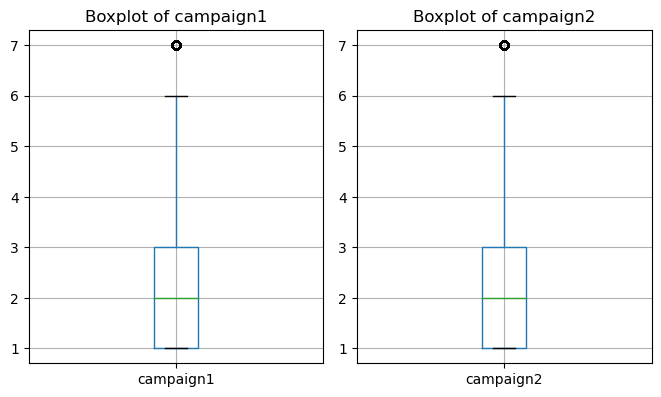

In [63]:
import matplotlib.pyplot as plt

cols = ['campaign1', 'campaign2']

plt.figure(figsize=(10, 15))
for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1)
    data.boxplot(column=col)  # Corrected this line
    plt.title(f'Boxplot of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()
